In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 2 - (07-02)\Global Power Plant - dataset.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df.drop({'country','owner','source','geolocation_source','name','generation_data_source','country_long','gppd_idnr','url','other_fuel3','wepp_id','estimated_generation_gwh','other_fuel2','year_of_capacity_data','commissioning_year'},axis=1,inplace=True)

In [7]:
df = df.dropna(subset=['other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'], how='all')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 3 to 903
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          450 non-null    float64
 1   latitude             438 non-null    float64
 2   longitude            438 non-null    float64
 3   primary_fuel         450 non-null    object 
 4   other_fuel1          199 non-null    object 
 5   generation_gwh_2013  384 non-null    float64
 6   generation_gwh_2014  401 non-null    float64
 7   generation_gwh_2015  425 non-null    float64
 8   generation_gwh_2016  437 non-null    float64
 9   generation_gwh_2017  443 non-null    float64
dtypes: float64(8), object(2)
memory usage: 38.7+ KB


In [9]:
df['generation_gwh_2013'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df['generation_gwh_2014'].fillna(int(df['generation_gwh_2014'].mean()), inplace=True)
df['generation_gwh_2015'].fillna(int(df['generation_gwh_2015'].mean()), inplace=True)
df['generation_gwh_2016'].fillna(int(df['generation_gwh_2016'].mean()), inplace=True)
df['generation_gwh_2017'].fillna(int(df['generation_gwh_2017'].mean()), inplace=True)
df['latitude'].fillna(int(df['latitude'].mean()), inplace=True)
df['longitude'].fillna(int(df['longitude'].mean()), inplace=True)
df['other_fuel1'] = df['other_fuel1'].fillna('Oil')

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['primary_fuel']=LE.fit_transform(df['primary_fuel'])
df['primary_fuel'].value_counts()

0    190
2    182
1     58
4     12
3      8
Name: primary_fuel, dtype: int64

In [11]:
LE.inverse_transform([0,1,2,3,4])

array(['Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil'], dtype=object)

In [12]:
df['other_fuel1']=LE.fit_transform(df['other_fuel1'])
df['other_fuel1'].value_counts()

2    447
1      2
0      1
Name: other_fuel1, dtype: int64

In [13]:
LE.inverse_transform([0,1,2])

array(['Cogeneration', 'Gas', 'Oil'], dtype=object)

In [14]:
df['capacity_mw']=df['capacity_mw'].replace(0,df['capacity_mw'].mean())

In [15]:
df['generation_gwh_2013']=df['generation_gwh_2013'].replace(0,df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].replace(0,df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].replace(0,df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].replace(0,df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].replace(0,df['generation_gwh_2017'].mean())

In [16]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,610.459424,21.721455,79.459402,1.097778,1.991111,2411.572876,2570.950075,2564.277050,2622.956325,2717.403855
std,708.005639,6.555947,5.061121,1.063358,0.115256,3467.512476,3736.662065,4017.314036,4036.817287,4093.160915
min,25.000000,8.169100,68.644700,0.000000,0.000000,0.019900,0.045355,0.118300,0.099500,0.425769
25%,106.920000,16.926400,76.331075,0.000000,2.000000,395.626925,389.189275,306.399250,288.711975,299.348237
50%,378.535500,22.184800,78.440750,1.000000,2.000000,1638.500450,1574.372000,1239.699375,1317.792925,1393.461000
75%,915.000000,26.149775,82.385975,2.000000,2.000000,2304.050519,2592.417562,2852.842500,3211.783550,3220.590912
max,4760.000000,34.649000,95.408000,4.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [17]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.025644,-0.018224,-0.471021,0.034713,0.776909,0.819017,0.831071,0.866380,0.889599
latitude,0.025644,1.000000,0.124409,-0.014712,0.054580,0.047020,0.049191,0.042892,0.030859,0.028342
longitude,-0.018224,0.124409,1.000000,-0.153284,0.071462,0.008558,0.009230,0.014545,0.039588,0.041880
primary_fuel,-0.471021,-0.014712,-0.153284,1.000000,-0.065582,-0.358966,-0.377915,-0.366901,-0.379270,-0.399000
other_fuel1,0.034713,0.054580,0.071462,-0.065582,1.000000,0.015777,0.015228,0.018132,0.011498,0.012773
generation_gwh_2013,0.776909,0.047020,0.008558,-0.358966,0.015777,1.000000,0.960414,0.889277,0.866759,0.827931
generation_gwh_2014,0.819017,0.049191,0.009230,-0.377915,0.015228,0.960414,1.000000,0.949469,0.922036,0.894930
generation_gwh_2015,0.831071,0.042892,0.014545,-0.366901,0.018132,0.889277,0.949469,1.000000,0.964087,0.924424
generation_gwh_2016,0.866380,0.030859,0.039588,-0.379270,0.011498,0.866759,0.922036,0.964087,1.000000,0.962015
generation_gwh_2017,0.889599,0.028342,0.041880,-0.399000,0.012773,0.827931,0.894930,0.924424,0.962015,1.000000


<AxesSubplot:>

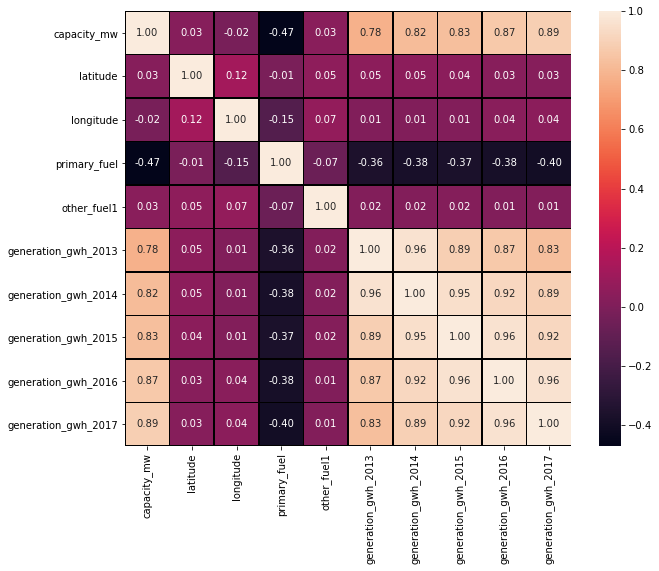

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor='black',fmt='.2f')

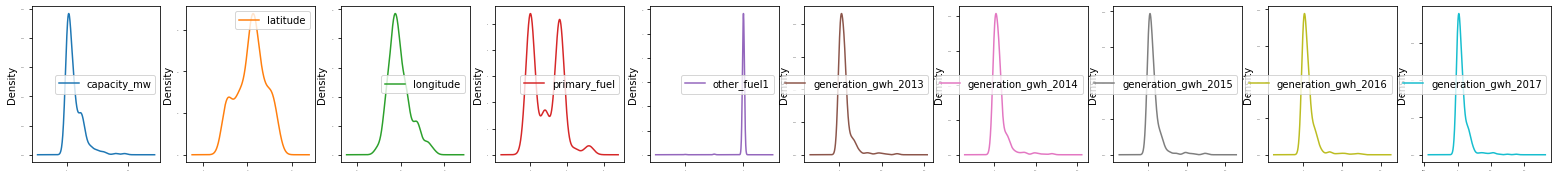

In [19]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

# primary_fuel

In [69]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

In [70]:
x.skew().sort_values(ascending=False)

generation_gwh_2015     3.822411
generation_gwh_2013     3.736960
generation_gwh_2017     3.649924
generation_gwh_2016     3.613097
generation_gwh_2014     3.600247
capacity_mw             2.302139
longitude               0.828122
latitude               -0.175241
other_fuel1           -14.378900
dtype: float64

In [71]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [72]:
x.skew().sort_values(ascending=False)

longitude               0.009966
generation_gwh_2013    -0.004878
generation_gwh_2014    -0.008739
capacity_mw            -0.029781
generation_gwh_2015    -0.032856
generation_gwh_2016    -0.039919
generation_gwh_2017    -0.041880
latitude               -0.102302
other_fuel1           -12.165221
dtype: float64

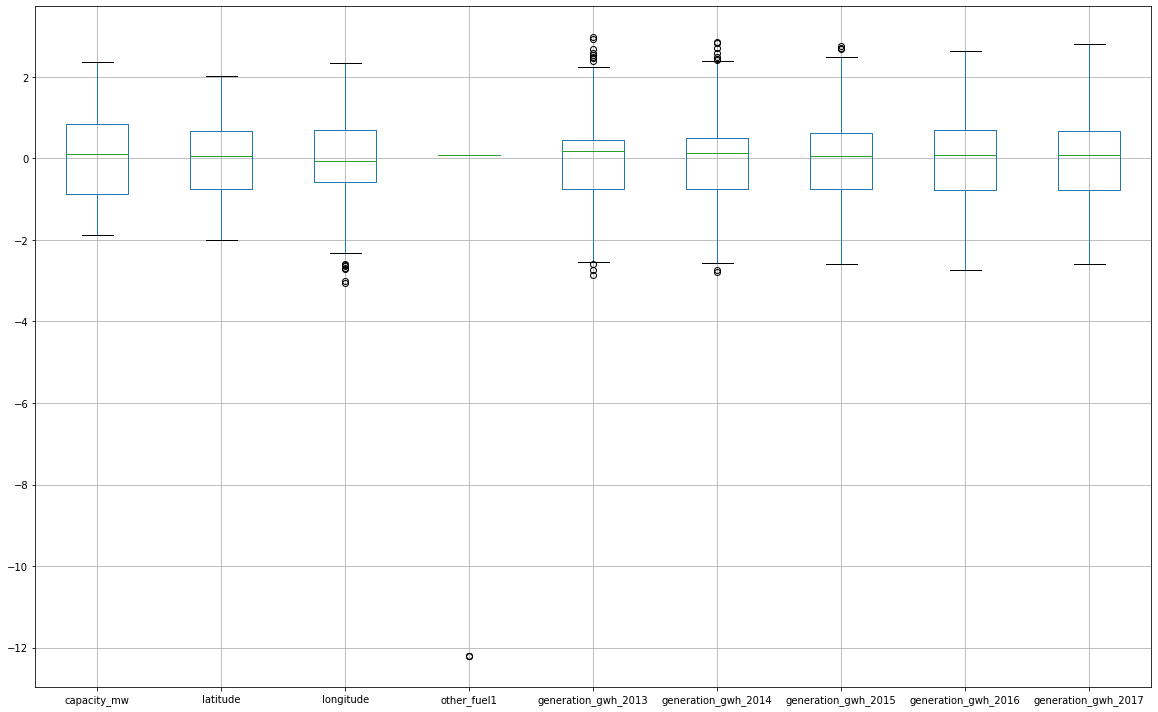

In [73]:
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(450, 9)

In [78]:
threshold=2.7
print(np.where(z>2.7))

(array([  2,  35, 116, 176, 194, 242, 242, 242, 243, 318, 323, 349, 405,
       407, 410, 441, 441, 441], dtype=int64), array([2, 4, 7, 5, 2, 4, 5, 6, 2, 4, 5, 6, 3, 3, 3, 4, 5, 8], dtype=int64))


In [79]:
x_new=x[(z<2.7).all(axis=1)]
print(x.shape)
print(x_new.shape)

(450, 9)
(436, 9)


In [80]:
loss_percent=(450-436)/450*100
print(loss_percent)

3.111111111111111


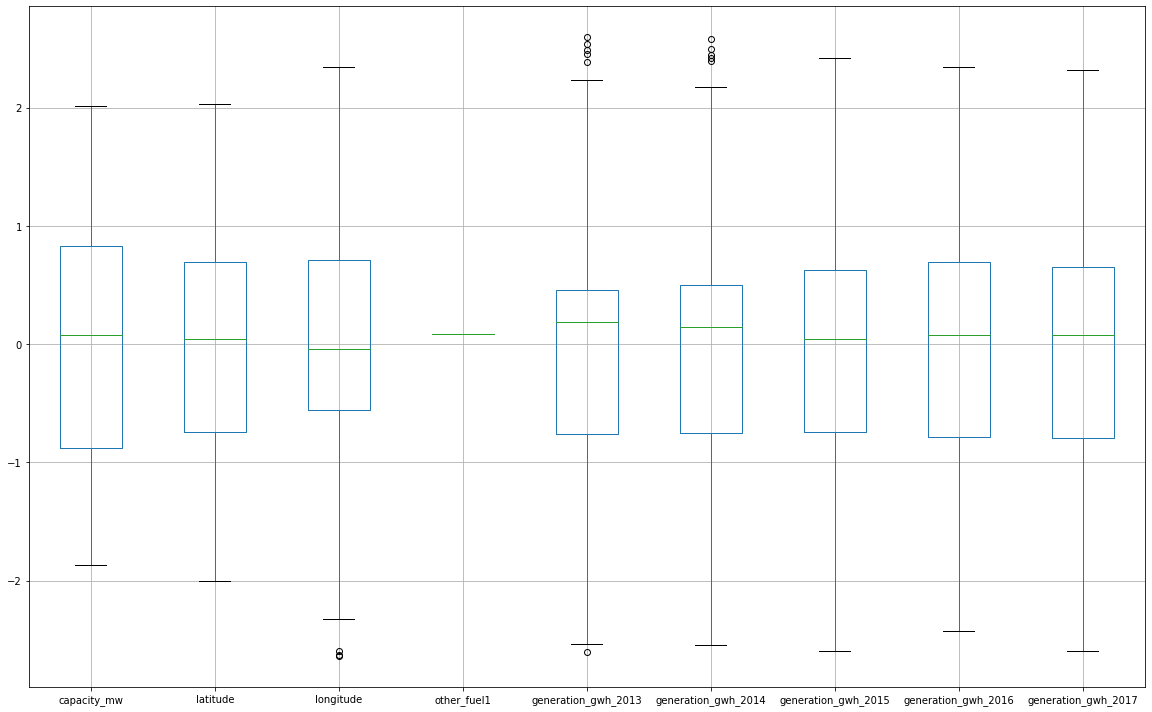

In [81]:
x_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [82]:
y_new=y[(z<2.7).all(axis=1)]
print(y.shape)
print(y_new.shape)

(450,)
(436,)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0 # max accuracy
maxRS=0 # best random state value for which max accuracy is achieved
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train) # Fitting the data will train the model
    predrf=LR.predict(x_test) # Predicting the data # Predicted traget variable
    acc=accuracy_score(y_test,predrf) # two target varaible # accuracy score
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Randon_state ",maxRS)

Best accuracy is  0.8068181818181818 on Randon_state  21


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=21)

In [85]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 80.68181818181817
[[40  0  3  0  0]
 [ 2  0  4  0  0]
 [ 3  0 31  0  1]
 [ 1  0  0  0  0]
 [ 1  0  2  0  0]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.00      0.00      0.00         6
           2       0.78      0.89      0.83        35
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3

    accuracy                           0.81        88
   macro avg       0.33      0.36      0.34        88
weighted avg       0.72      0.81      0.76        88



In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 81.81818181818183
[[38  1  2  1  1]
 [ 0  3  3  0  0]
 [ 5  0 28  0  2]
 [ 1  0  0  0  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.75      0.50      0.60         6
           2       0.85      0.80      0.82        35
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         3

    accuracy                           0.82        88
   macro avg       0.59      0.64      0.59        88
weighted avg       0.83      0.82      0.82        88



In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 84.0909090909091
[[39  1  3  0  0]
 [ 0  3  3  0  0]
 [ 2  1 31  0  1]
 [ 1  0  0  0  0]
 [ 1  0  1  0  1]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.60      0.50      0.55         6
           2       0.82      0.89      0.85        35
           3       0.00      0.00      0.00         1
           4       0.50      0.33      0.40         3

    accuracy                           0.84        88
   macro avg       0.56      0.53      0.54        88
weighted avg       0.83      0.84      0.83        88



In [88]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 82.95454545454545
[[39  0  4  0  0]
 [ 0  2  4  0  0]
 [ 3  0 32  0  0]
 [ 1  0  0  0  0]
 [ 2  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       1.00      0.33      0.50         6
           2       0.78      0.91      0.84        35
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3

    accuracy                           0.83        88
   macro avg       0.53      0.43      0.45        88
weighted avg       0.80      0.83      0.80        88



In [89]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_new,y_new,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(dt,x_new,y_new,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr.mean())
scr2=cross_val_score(rf,x_new,y_new,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(svc,x_new,y_new,cv=5)
print("Cross Validation Score Of SVC Model :",scr3.mean())

Cross Validation Score Of Logistic Regression Model : 0.6835161964472308
Cross Validation Score Of Decision Tree Model : 0.6835161964472308
Cross Validation Score Of Random Forest Model : 0.7500522466039707
Cross Validation Score Of SVC Model : 0.7225966562173459


In [90]:
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8409090909090909

In [91]:
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Fuel=pd.DataFrame({'Original_Data':a,'Predicted_Data':predicted},index=range(len(a)))
Fuel

,Original_Data,Predicted_Data
0,0,0
1,0,0
2,0,0
3,1,1
4,2,2
5,3,0
6,1,2
7,0,0
8,0,0
9,0,0


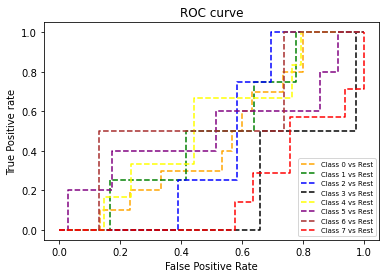

In [92]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate 2 class dataset
x_new, y_new = make_classification(n_samples=200, n_classes=8, n_features=10, n_informative=8, random_state=14)
# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.20, random_state=14)
# fit model
clf = OneVsRestClassifier(GCV.best_estimator_)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 8
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,x_test[:,i], pos_label=i)
# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='red', label='Class 7 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right',fontsize='x-small')
plt.savefig('Multiclass ROC',dpi=100)
plt.show()

# capacity_mw - 

In [20]:
# Checking Skweness
df.skew().sort_values()

other_fuel1           -14.378900
latitude               -0.175241
primary_fuel            0.429153
longitude               0.828122
capacity_mw             2.302139
generation_gwh_2014     3.600247
generation_gwh_2016     3.613097
generation_gwh_2017     3.649924
generation_gwh_2013     3.736960
generation_gwh_2015     3.822411
dtype: float64

In [21]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
df_new=power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)

In [22]:
df.skew().sort_values()

other_fuel1           -12.165221
latitude               -0.102302
generation_gwh_2017    -0.041880
generation_gwh_2016    -0.039919
generation_gwh_2015    -0.032856
capacity_mw            -0.029781
primary_fuel           -0.019336
generation_gwh_2014    -0.008739
generation_gwh_2013    -0.004878
longitude               0.009966
dtype: float64

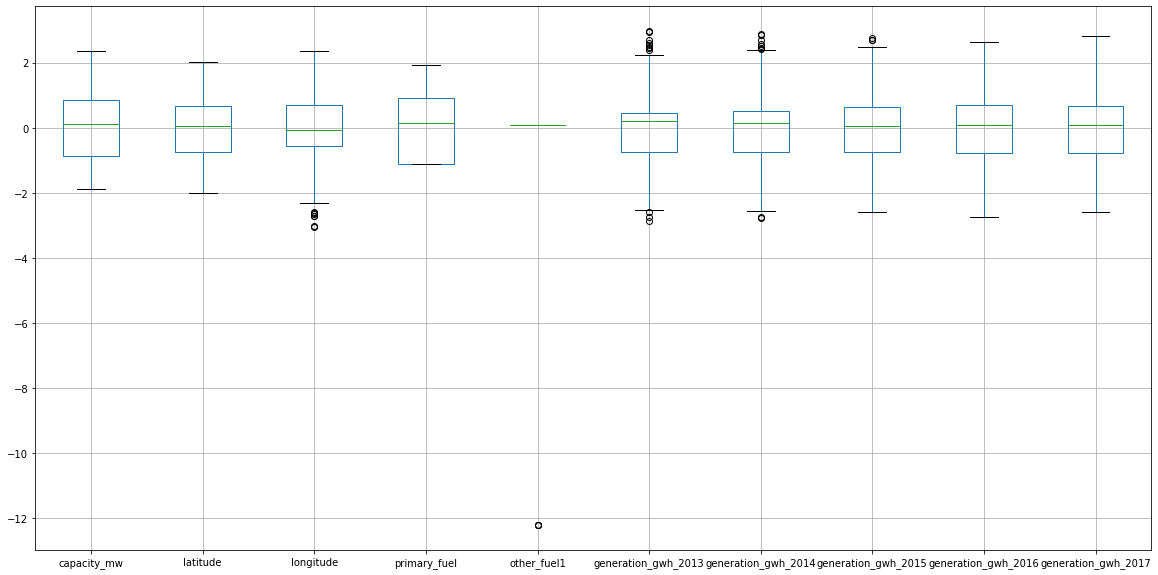

In [23]:
# Plot boxplot
df.boxplot(figsize=[20,10])
plt.show()

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(450, 10)

In [25]:
threshold=3
print(np.where(z>3))

(array([  2, 194, 405, 407, 410], dtype=int64), array([2, 2, 4, 4, 4], dtype=int64))


In [26]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(450, 10)
(445, 10)


In [27]:
# % data loss
loss_percent=(450-445)/450*100
print(loss_percent)

1.1111111111111112


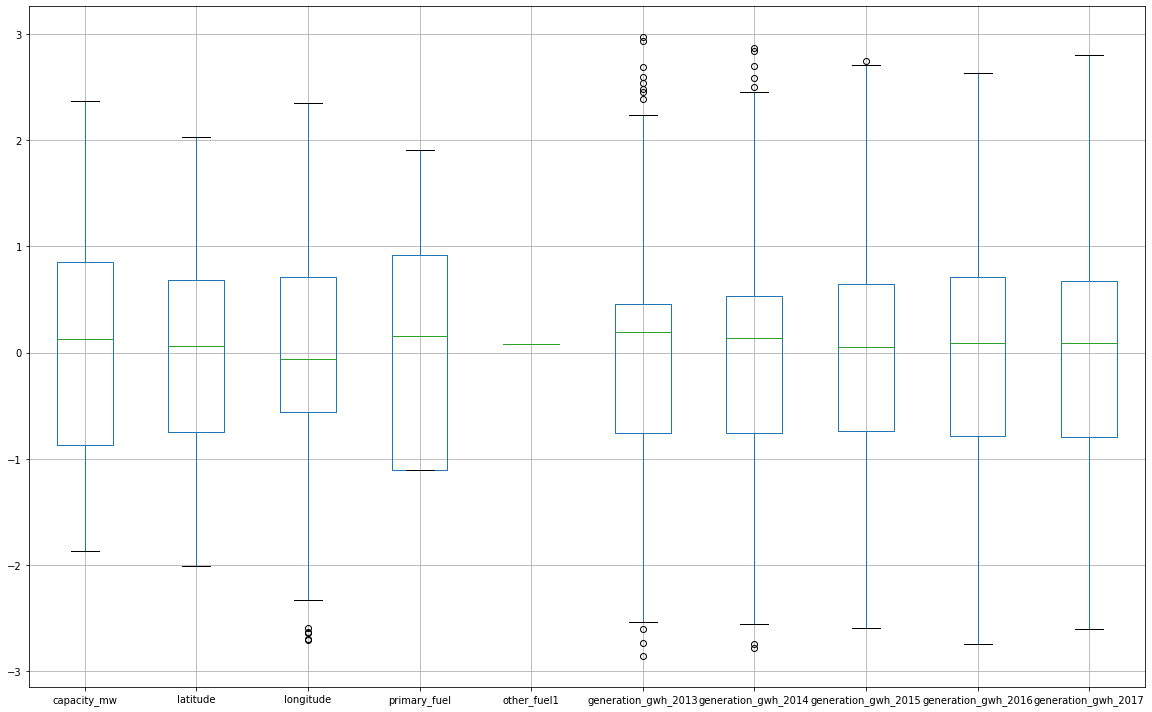

In [28]:
# Plot boxplot - To Check outliers 
df_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [29]:
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']

In [30]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [31]:
for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.7512588321315146
At Random State 0, the training accuracy is :- 0.6412734000454785


At Random State 1, the training accuracy is :- 0.7298187162378758
At Random State 1, the training accuracy is :- 0.7336974933217797


At Random State 2, the training accuracy is :- 0.7136733511811328
At Random State 2, the training accuracy is :- 0.7890139061436625


At Random State 3, the training accuracy is :- 0.7316324613392118
At Random State 3, the training accuracy is :- 0.7111896875955446


At Random State 4, the training accuracy is :- 0.7215345649754443
At Random State 4, the training accuracy is :- 0.7634081657106296


At Random State 5, the training accuracy is :- 0.722988352941104
At Random State 5, the training accuracy is :- 0.748850480698548


At Random State 6, the training accuracy is :- 0.7492178062301185
At Random State 6, the training accuracy is :- 0.6464816995368144


At Random State 7, the training accuracy is :- 0.722375281525491

In [32]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  0.6921738270023869 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 3 the cv score is  0.7162409118830708 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 4 the cv score is  0.7124370191247558 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 5 the cv score is  0.7086006818172235 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 6 the cv score is  0.7166671093681938 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 7 the cv score is  0.7139664885051363 and accuracy score for training is 0.7292093845513767 and accuracy score for testing is 0.7121780311752701


At cross fold 8 the cv score is  0

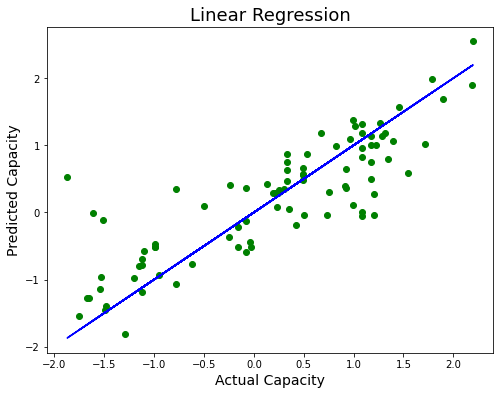

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Capacity', fontsize=14)
plt.ylabel('Predicted Capacity', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [34]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [35]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7146764458664177

In [36]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

70.90860567640071

In [37]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.8098755776119786

In [38]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,-0.782835,0.348980
1,-1.752802,-1.536819
2,-1.512463,-0.106906
3,-0.154869,-0.211044
4,1.170238,1.143705
5,1.173602,0.744968
6,-0.498668,0.096654
7,0.423678,-0.192013
8,1.459327,1.569311
9,1.085760,1.322554


In [39]:
# Model Saving
import pickle
filename = 'Global_PowerPlant.pkl'
pickle.dump(lr,open(filename,'wb'))

# Thanks...!!!